<a href="https://colab.research.google.com/github/alessandra-cardozo/Imersao-agentes-IA-Alessandra-Python/blob/main/Visao_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🟩 Detecção Facial Estilizada com OpenCV

Este projeto utiliza técnicas de Visão Computacional para detectar **rostos, olhos e sorrisos** em imagens usando classificadores Haar do OpenCV. A imagem utilizada é de **Carlo Acutis**, com destaque visual estilizado para os elementos faciais.

---

## 💡 Objetivo

Criar uma aplicação simples e visualmente agradável que detecta traços faciais em imagens, com foco em estética e clareza visual.

---

## 🧰 Tecnologias Utilizadas

- Python 3
- OpenCV
- Matplotlib
- Google Colab

---

## 📷 Resultado Esperado

Uma imagem com retângulos coloridos destacando:
- 🟩 Rosto
- 🔵 Olhos
- 🔴 Sorriso

---

## 🚀 Como Executar

1. Execute todas as células do notebook
2. A imagem será processada e exibida com os elementos detectados
3. Você pode substituir a imagem por qualquer outra para testar

---

Feito com 💚 por Alessandra


In [1]:
import cv2
print(cv2.__version__)

4.12.0


In [2]:
from google.colab import files

uploaded = files.upload()

Saving Carlo Acutis.png to Carlo Acutis.png


/tmp/ipython-input-4168370992.py:67: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


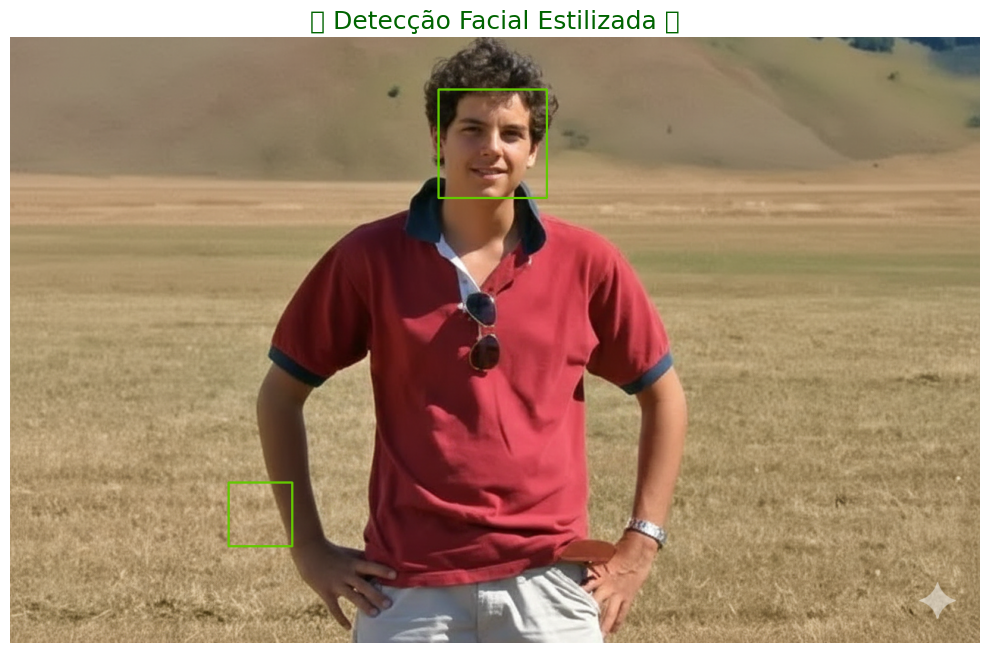

In [12]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

# Nome da imagem
imagem_nome = 'Carlo Acutis.png'

# Carrega a imagem
img = cv2.imread(imagem_nome)

# Verifica se a imagem foi carregada corretamente
if img is None:
    print(f"Erro ao carregar a imagem: {imagem_nome}")
else:
    # Converte para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Carrega os classificadores Haar
    face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    eye_cascade_path = cv2.data.haarcascades + 'haarcascade_eye.xml'
    smile_cascade_path = cv2.data.haarcascades + 'haarcascade_smile.xml'

    face_cascade = cv2.CascadeClassifier(face_cascade_path)
    eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
    smile_cascade = cv2.CascadeClassifier(smile_cascade_path)

    # Check if cascades loaded correctly
    if face_cascade.empty():
        print(f"Erro ao carregar o classificador de rosto: {face_cascade_path}")
    if eye_cascade.empty():
        print(f"Erro ao carregar o classificador de olhos: {eye_cascade_path}")
    if smile_cascade.empty():
        print(f"Erro ao carregar o classificador de sorriso: {smile_cascade_path}")

    if not face_cascade.empty() and not smile_cascade.empty(): # Modified condition to exclude eye_cascade check
        # Detecta rostos
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Rosto: verde suave
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 200, 100), 2)

            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]

            # Olhos: azul claro - Skip eye detection for now
            # eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
            # for (ex, ey, ew, eh) in eyes:
            #     cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (100, 150, 255), 2)

            # Sorriso: rosa suave
            smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22)
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (255, 100, 180), 2)

        # Converte para RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Exibe com estilo
        plt.figure(figsize=(10, 8))
        plt.imshow(img_rgb)
        plt.axis('off')

        # Fonte personalizada (opcional)
        # fonte = fm.FontProperties(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf')
        plt.title('✨ Detecção Facial Estilizada ✨', fontsize=18, color='darkgreen')
        plt.tight_layout()
        plt.show()
    else:
        print("Could not load face or smile cascade files.") # Added message if face or smile cascade fails